# Text Data Analysis -<font color= RED>Youtube</font> Case Study

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('F:/Dataset/Youtube Comments/UScomments.csv',error_bad_lines= False);

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\shubham\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
df.shape

(691400, 4)

In [5]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## TextBlob

In [8]:
from textblob import TextBlob

In [9]:
TextBlob('awesome 😉').sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [10]:
TextBlob('bad video').sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

### For now we will not consider the sample of data if your PC spec are low you can use sampleing 


In [11]:
#df = df[0:10000]

In [12]:
#finding polarity for each comment 
polarity = []
for i in df['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.appendend(0)
        

In [13]:
# lets post the first 10 polarity values
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [14]:
df['polarity']=polarity

In [15]:
df.head(20)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   
15  XpVt6Z1Gjjo                       He happy cause he in a movie     0   
16  XpVt6Z1Gjjo  Ayyyyoooo Logang what up .  This was a hard vl...     1   
17  XpVt6Z1Gjjo  Bro y didnt u give merch to johannes he is ur ...     0   
18  XpVt6Z1Gjjo  It's been fun watching you grow. I'm at 42 day...     3   
19  XpVt6Z1Gjjo             Made a lot of people hate youtube - GJ     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000  
15       0  0.800000  
16       0 -0.291667  
17       0  0.000000  
18       0  0.250000  
19       0 -0.800000

# WordCloud

Before genrating wordcloud lets seprate all neagtive sentiment and positive sentiment into variables

In [16]:
positive_polarity = df[df['polarity']==1]

In [17]:
negative_polarity = df[df['polarity']==-1]

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
negative_polarity['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [20]:
total_negative_comments=" ".join(negative_polarity['comment_text'])

In [21]:
total_negative_comments[0:150]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how"

## Displaying Word Cloud of Negative Comments

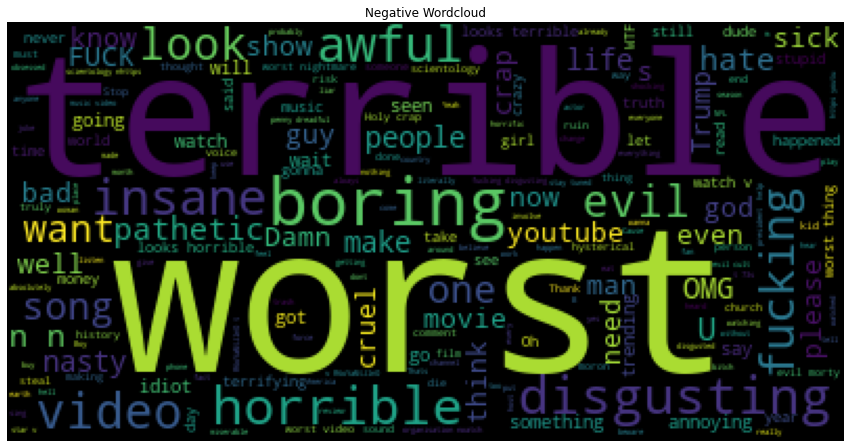

In [22]:
negative_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize=(15,10))
plt.title('Negative Wordcloud')
plt.axis('off')
plt.imshow(negative_wordcloud)

## Positive Comments WordCloud

In [23]:
total_positive_comments=" ".join(positive_polarity['comment_text'])

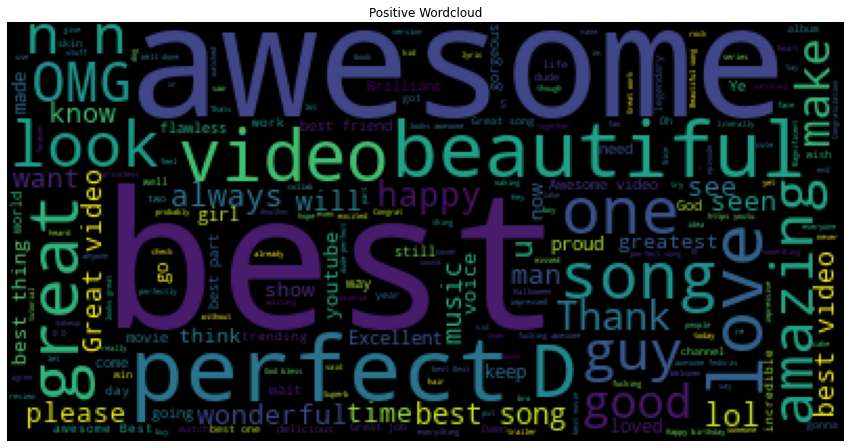

In [24]:
positive_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize=(15,10))
plt.title('Positive Wordcloud')
plt.axis('off')
plt.imshow(positive_wordcloud)

In [25]:
!pip install emoji==1.6.1

# Perform emoji Analysis 

In [26]:
import emoji

In [27]:
df.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [28]:
print('\U0001F600')

😀


We need to extracte the emojies from comments in order to do analysis 

In [29]:
emoji_list = []
for i in df['comment_text']:
    for j in i:
        if j in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(j)

In [30]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [31]:
len(emoji_list)

294549

In [32]:
from collections import Counter

In [33]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [38]:
emojies = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [36]:
frequency = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [37]:
frequency

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [39]:
emojies

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [40]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [44]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [45]:
trace = go.Bar(x=emojies,y=frequency)

In [46]:
iplot([trace])